In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
#read the data
#dowmload dataset from https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data 

data_path = 'CC_GENERAL.csv'
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


# Brief description of the data set and a summary of its attributes

# objective: cluster data to figure out different segments of clients using two models 
## model 1- kmeans
## model 2- heirarcial clustering
## use pca for dimensionality reduction and data visualization

### The Dataset summarizes the usage behavior of 8950 active credit card holders in the last 6 months.
#### The data contains 18 behavior variables of each client.
* CUSTID : Credit Card Holder ID 
* BALANCE : The remaining balance in their account for shopping
* BALANCE_FREQUENCY : How often the balance is updated, 0 to 1 score (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : The amount of purchases made from the account
* ONEOFF_PURCHASES : The maximum amount of purchases made at one time
* INSTALLMENTS_PURCHASES : Amount of shopping in installments
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : Rate of how often purchases are made, from 0 to 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY : How often purchases occur at once (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY : How often installment purchases are made (1=frequent, 0=not frequent)
* CASH_ADVANCE_FREQUENCY : How often the down payment is made
* CASHADVANCE_TRX : Number of Transactions with "Advanced Cash"
* PURCHASES_TRX : Number of purchases made
* CREDIT_LIMIT : Credit Card Limit for User
* PAYMENTS : Amount of payment made by the user
* MINIMUM_PAYMENTS : The minimum payment amount made by the user
* PRC_FULL_PAYMENT : Percentage of full payment paid by the user
* TENURE : The duration of the credit card service for the user

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

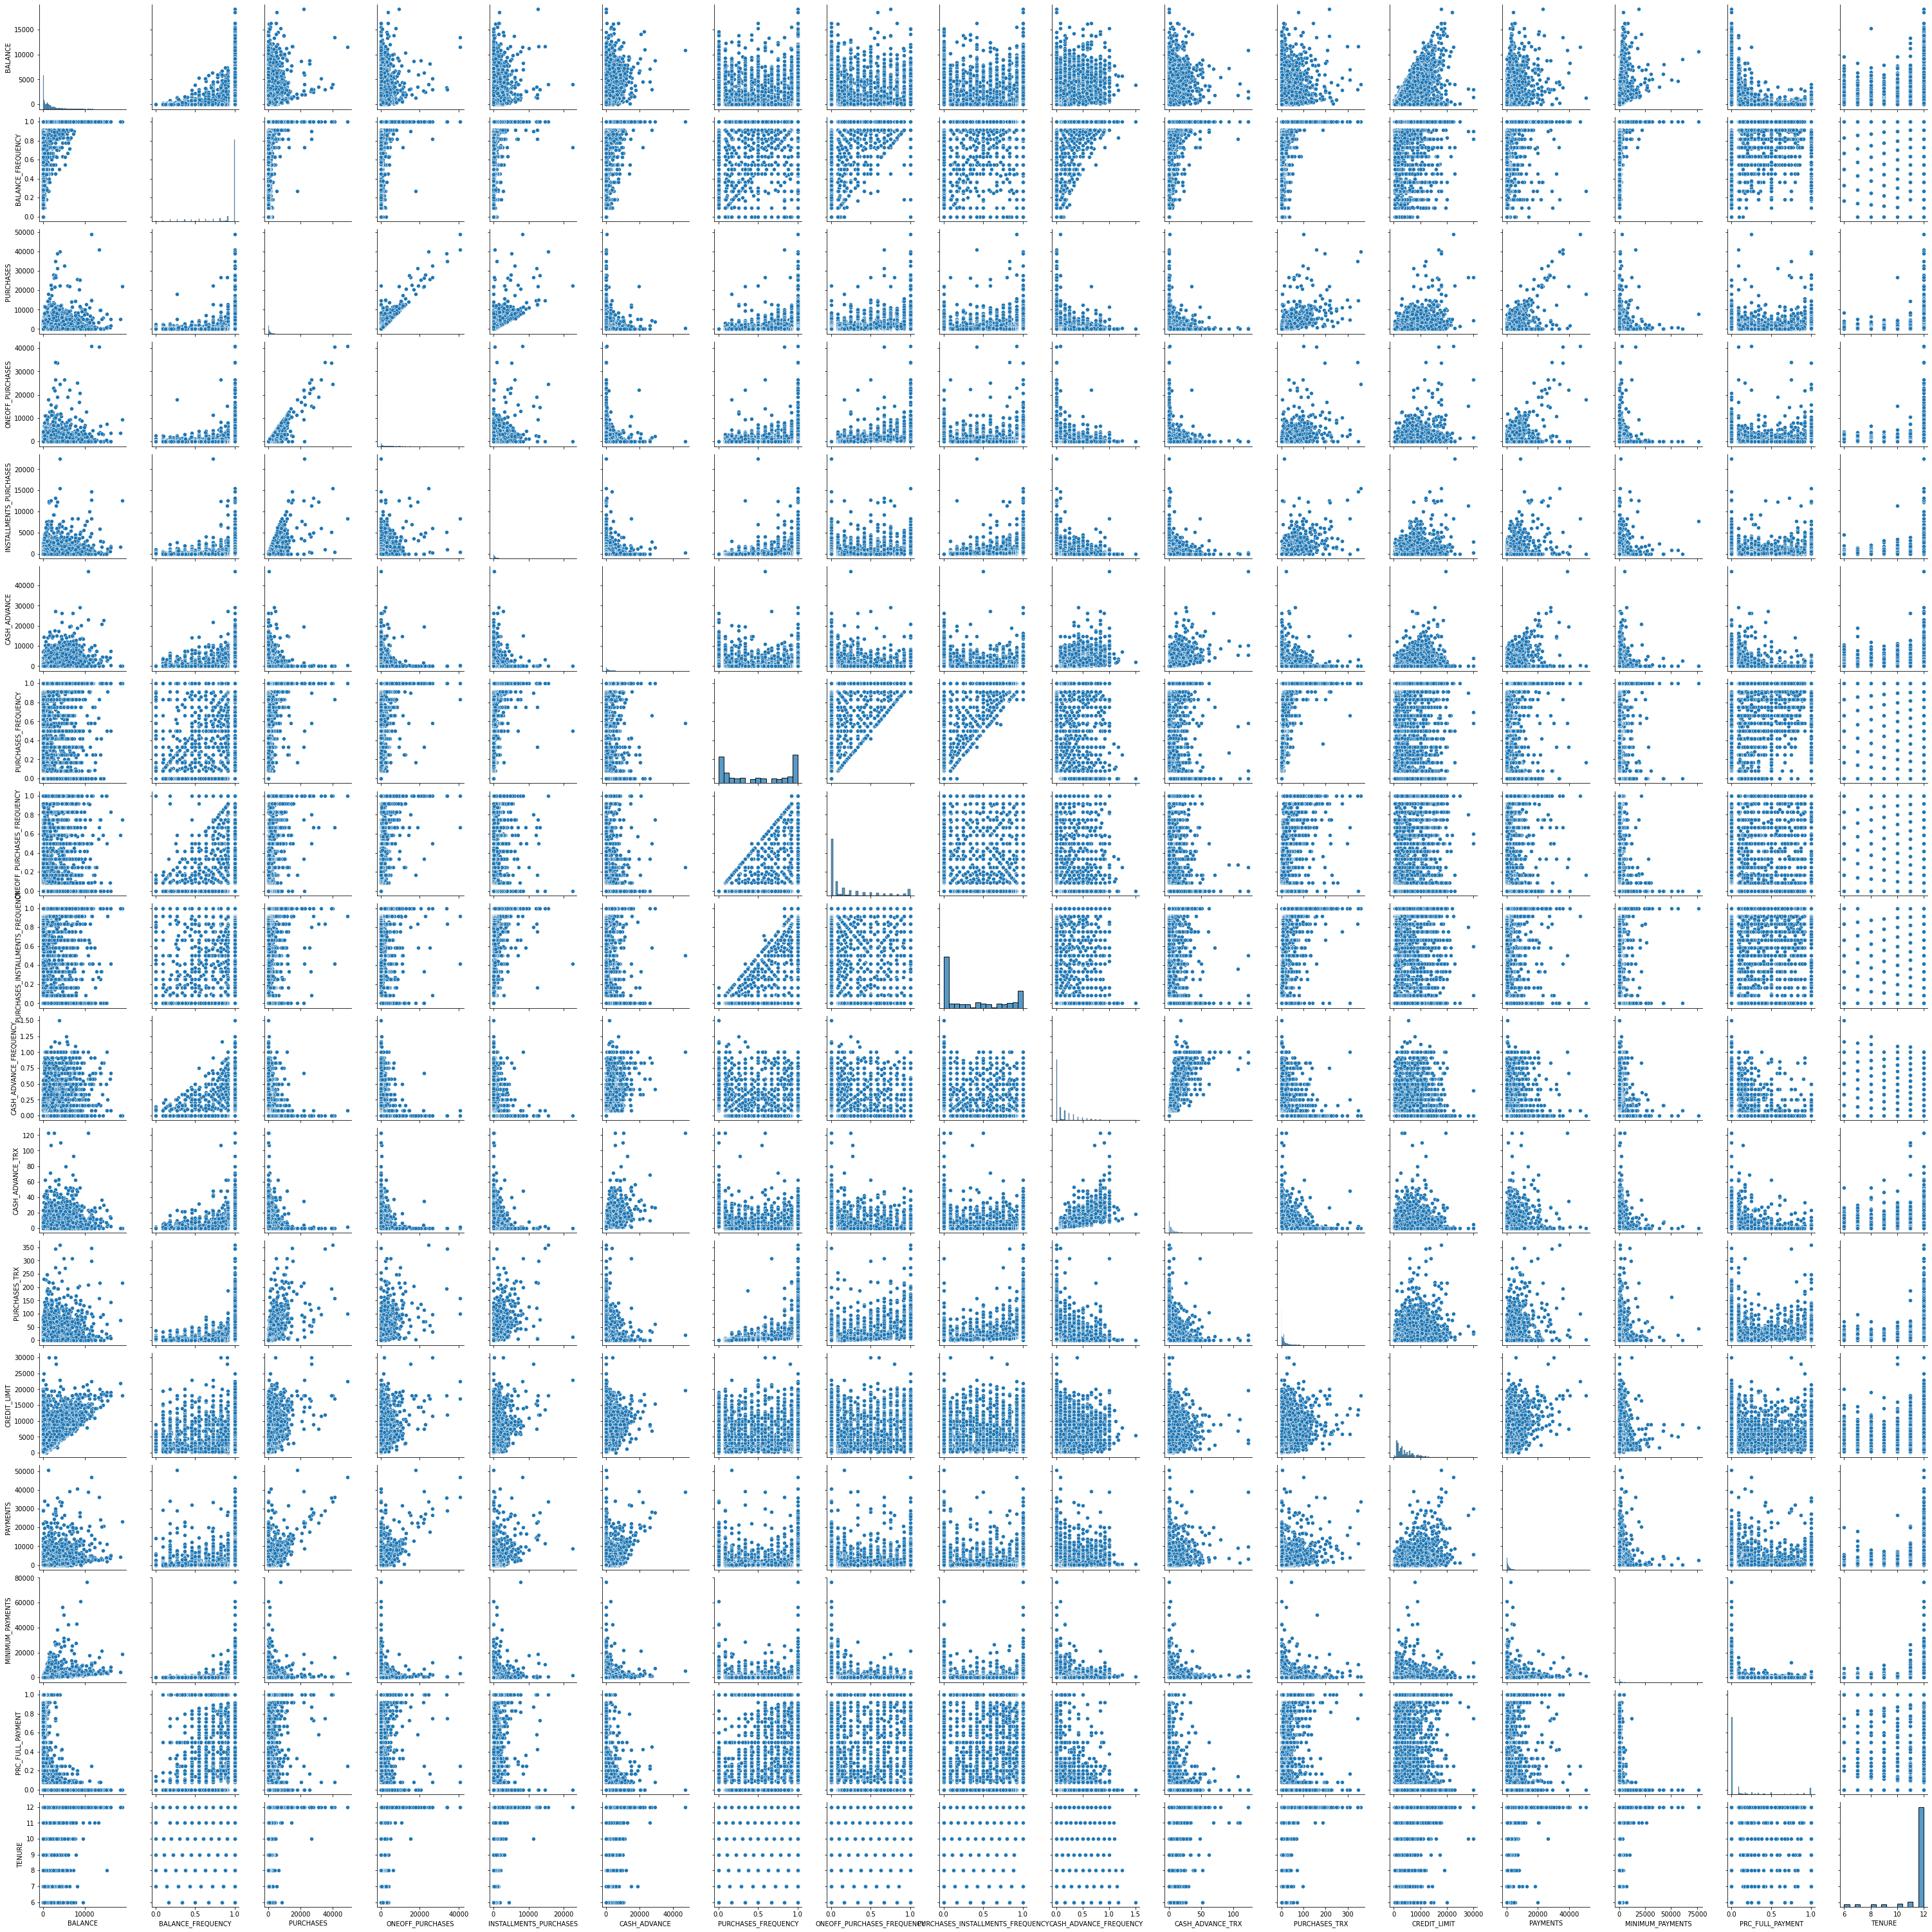

In [43]:
sns.pairplot(df)

# Initial plan for data exploration

## in this part i check the data quality, assess any issues in the data and fix it:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)

## drop id column

In [6]:
df_copy = df.drop(columns='CUST_ID')

In [7]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# null values

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
df_copy.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## solution

In [10]:
df_copy = df_copy.fillna(df_copy.median())

In [11]:
df_copy.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## data types

In [12]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### all data types seems correct

## outliers

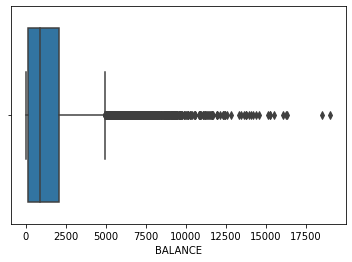

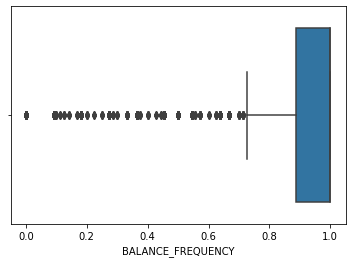

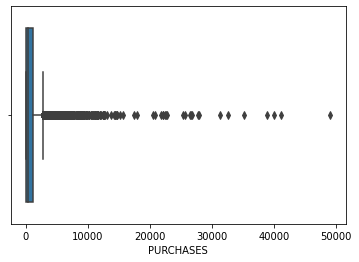

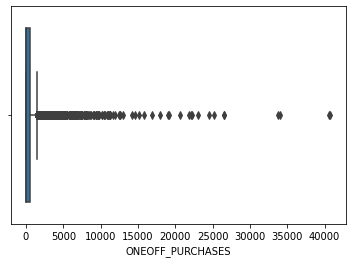

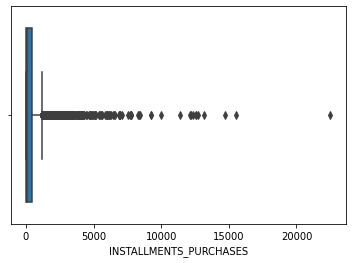

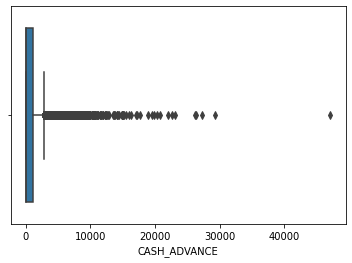

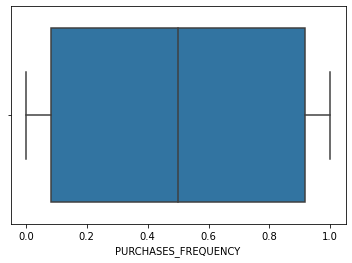

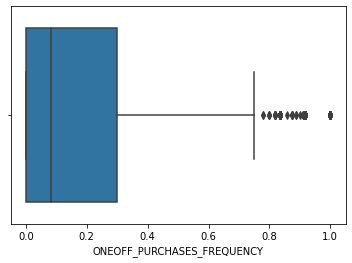

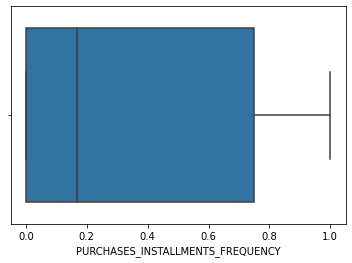

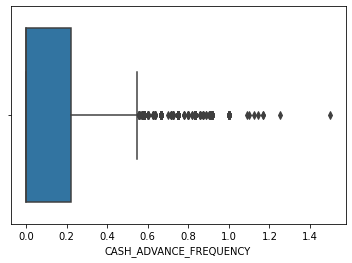

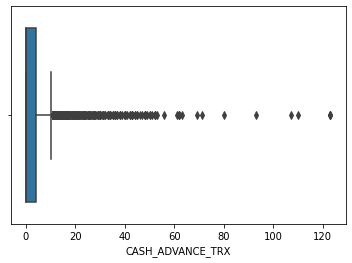

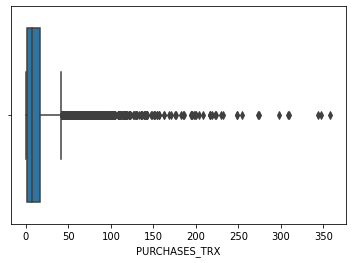

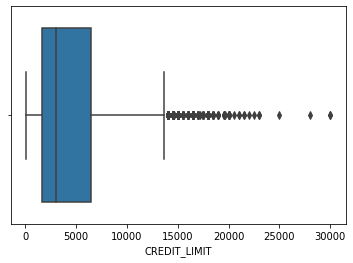

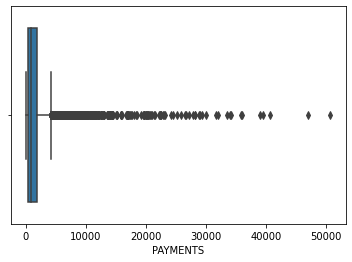

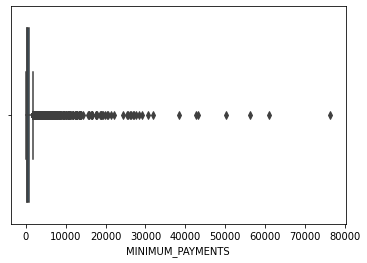

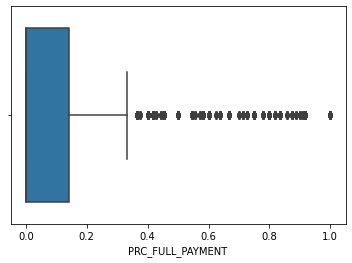

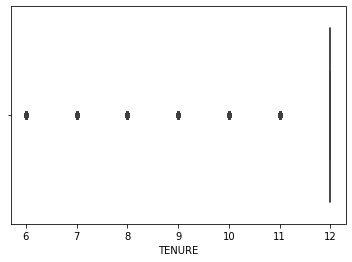

In [14]:
for col in df_copy.columns:
    sns.boxplot(df_copy[col])
    plt.show()

### there are alot of outliers here so i can't remove them 

# transform data

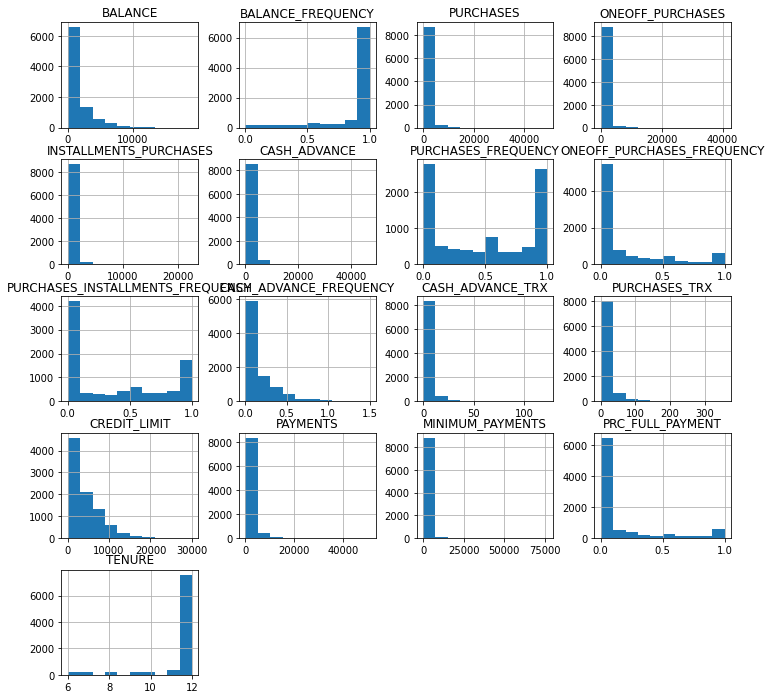

In [15]:
df_copy.hist(figsize=(12,12));

In [16]:
columns_to_unskew = []
columns_boxcox = []
for col in df_copy.columns:
    skew = df_copy[col].skew()
    print("skewness for ",col," is ", skew)
    if skew > 1 or skew < -1:
#         if col == 'BALANCE_FREQUENCY' or col == 'TENURE':
#             columns_boxcox.append(col)
#         else:
        columns_to_unskew.append(col)
    

skewness for  BALANCE  is  2.393386042571806
skewness for  BALANCE_FREQUENCY  is  -2.0232655185149078
skewness for  PURCHASES  is  8.144269064554651
skewness for  ONEOFF_PURCHASES  is  10.045082884700278
skewness for  INSTALLMENTS_PURCHASES  is  7.299119908745641
skewness for  CASH_ADVANCE  is  5.166609074074723
skewness for  PURCHASES_FREQUENCY  is  0.06016423585803591
skewness for  ONEOFF_PURCHASES_FREQUENCY  is  1.5356127835248519
skewness for  PURCHASES_INSTALLMENTS_FREQUENCY  is  0.5092011649999882
skewness for  CASH_ADVANCE_FREQUENCY  is  1.828686266477852
skewness for  CASH_ADVANCE_TRX  is  5.721298203192298
skewness for  PURCHASES_TRX  is  4.630655265932403
skewness for  CREDIT_LIMIT  is  1.5226359501884323
skewness for  PAYMENTS  is  5.907619794397562
skewness for  MINIMUM_PAYMENTS  is  13.852446498665346
skewness for  PRC_FULL_PAYMENT  is  1.942819940971858
skewness for  TENURE  is  -2.9430172876199134


## alot of the columns are skewed

In [17]:
print(columns_to_unskew)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [18]:
from scipy import stats

In [19]:
df_copy[columns_to_unskew] = np.log1p(df_copy[columns_to_unskew])

In [20]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


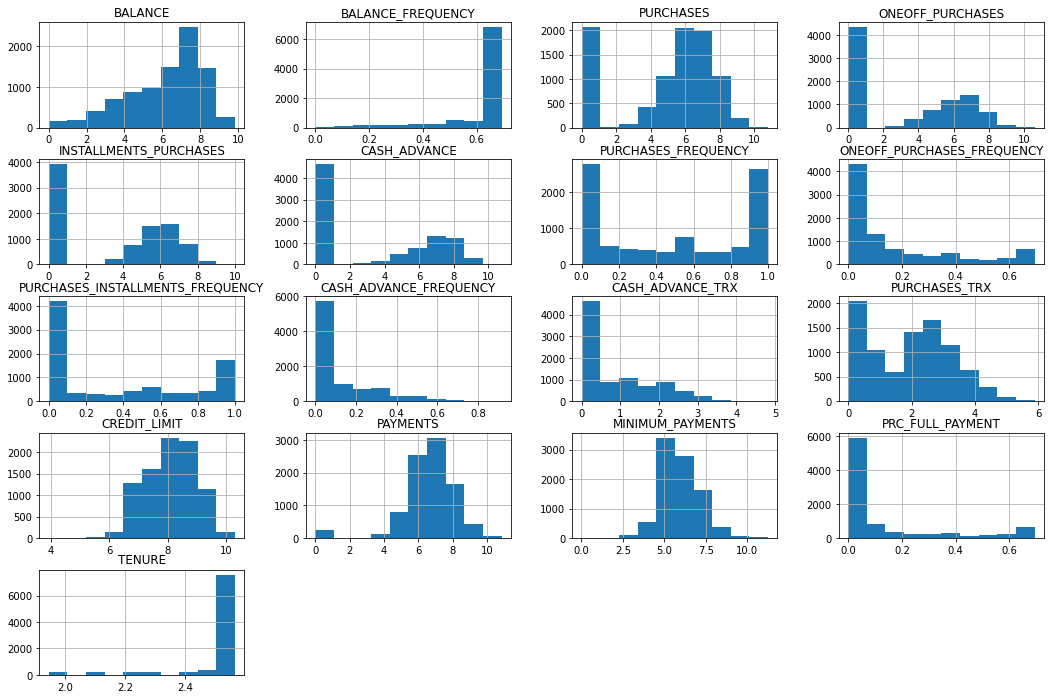

In [21]:
df_copy.hist(figsize=(18,12));

In [22]:
for col in df_copy.columns:
    skew = df_copy[col].skew()
    print("skewness for ",col," is ", skew)

skewness for  BALANCE  is  -0.8610205518180273
skewness for  BALANCE_FREQUENCY  is  -2.2855344948472056
skewness for  PURCHASES  is  -0.7644920914994583
skewness for  ONEOFF_PURCHASES  is  0.18585352201056776
skewness for  INSTALLMENTS_PURCHASES  is  -0.024981407335231534
skewness for  CASH_ADVANCE  is  0.2625943575179137
skewness for  PURCHASES_FREQUENCY  is  0.06016423585803591
skewness for  ONEOFF_PURCHASES_FREQUENCY  is  1.290617384929614
skewness for  PURCHASES_INSTALLMENTS_FREQUENCY  is  0.5092011649999882
skewness for  CASH_ADVANCE_FREQUENCY  is  1.4554621403509649
skewness for  CASH_ADVANCE_TRX  is  0.9401307113667499
skewness for  PURCHASES_TRX  is  0.03269683973776023
skewness for  CREDIT_LIMIT  is  -0.10140769035040573
skewness for  PAYMENTS  is  -1.7783116765536935
skewness for  MINIMUM_PAYMENTS  is  0.2697032421700201
skewness for  PRC_FULL_PAYMENT  is  1.746045835389638
skewness for  TENURE  is  -3.17022189488059


In [23]:
### some columns still have high skewness due to unbalanced categories

# standardization and scaling

In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_copy[df_copy.columns] = scaler.fit_transform(df_copy)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.399999,-0.305081,-0.111112,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.000000
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.600000,-0.305081,-0.222223,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.000000
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.600000,2.336846,-0.222223,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.000000
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.500000,0.000000,-0.222223,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.000000
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.225316,0.000000,-0.065060,-0.576007,0.191379,0.000000,0.600000,-0.305081,0.888888,0.000000,0.000000,-0.060773,-0.783504,-0.603844,-1.204950,3.036481,-0.619039
8946,-1.362447,0.000000,-0.056009,-0.576007,0.196246,0.000000,0.600000,-0.305081,0.888888,0.000000,0.000000,-0.060773,-0.783504,-0.707136,0.000000,0.000000,-0.619039
8947,-1.293875,-1.522289,-0.275934,-0.576007,0.077972,0.000000,0.399999,-0.305081,0.666667,0.000000,0.000000,-0.130930,-0.783504,-1.465873,-0.867823,1.671096,-0.619039
8948,-1.483062,-1.522289,-1.780990,-0.576007,-0.731443,0.516772,-0.600000,-0.305081,-0.222223,0.768179,0.682606,-0.946395,-1.277428,-1.734354,-1.120356,1.671096,-0.619039


## duplicates 

In [25]:
df_copy.duplicated().sum()

0

### no duplicate values

## saving clean data

In [26]:
df_clean = df_copy.copy()
df_clean.to_csv("credit_card_cleanData")

In [27]:
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.399999,-0.305081,-0.111112,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.0
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.600000,-0.305081,-0.222223,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.0
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.600000,2.336846,-0.222223,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.0
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.500000,0.000000,-0.222223,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.0
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.0


# Model 1- Kmeans clustering

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


## find optimal number of clusters for kmeans

In [29]:
inertia= []
distortions = []
n = 20
start = 1
for i in range(start,n): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
    km.fit(df_clean)
    distortion = sum(np.min(cdist(df_clean, km.cluster_centers_,'euclidean'), axis=1)) / df_clean.shape[0]
    inertia.append(km.inertia_)
    distortions.append(distortion)

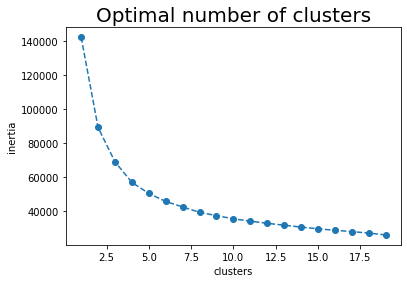

In [30]:
plt.plot(range(start,n),inertia , marker='o', linestyle='--')
plt.title('Optimal number of clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('inertia')

plt.show()

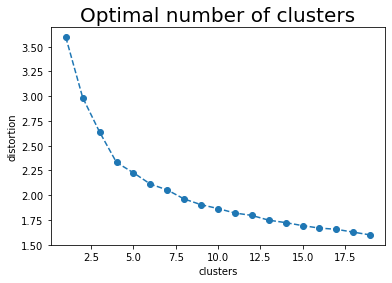

In [31]:
plt.plot(range(start,n),distortions , marker='o', linestyle='--')
plt.title('Optimal number of clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('distortion')

plt.show()

## around 4 clusters seems to be a good choice

In [32]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
km.fit(df_clean)
df_clean_copy = df_clean.copy()
df_clean_copy['kmeans'] = km.labels_

In [33]:
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.399999,-0.305081,-0.111112,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.0
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.600000,-0.305081,-0.222223,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.0
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.600000,2.336846,-0.222223,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.0
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.500000,0.000000,-0.222223,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.0
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.0


# Model 2- Hierarchical clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


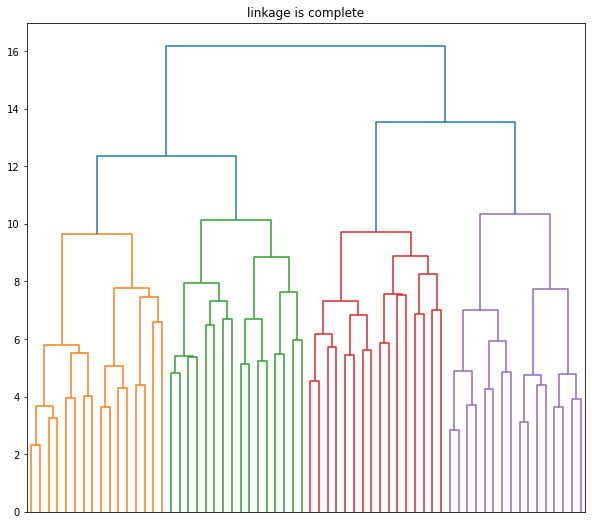

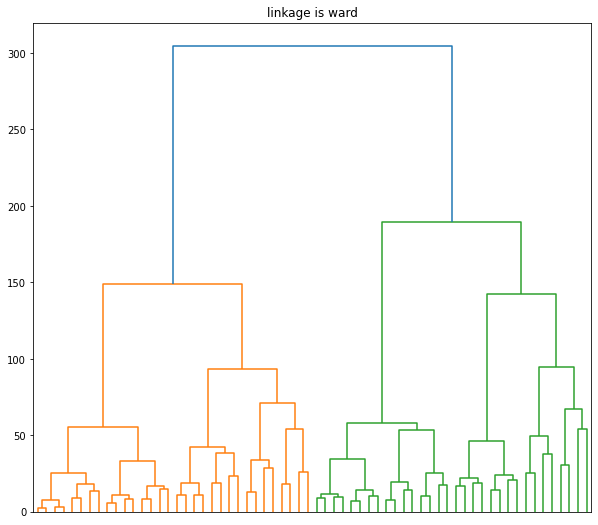

In [34]:
linkage_list = ['complete', 'ward']

clustering_models = []
for link in linkage_list:
    clustering = linkage(df_clean, link)
    clustering_models.append(clustering)
    plt.figure(figsize=(10,9))
    plt.title('linkage is '+ link)
    dendrogram(clustering, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
    plt.show()

## 4 clusters seems to be a good choice based on the dendo grames

In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster_complete = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster_complete.fit_predict(df_clean)

df_clean_copy['heir_complete']= cluster_complete.labels_

cluster_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_ward.fit_predict(df_clean)

df_clean_copy['heir_ward']= cluster_ward.labels_


In [37]:
df_clean_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans,heir_complete,heir_ward
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.399999,-0.305081,-0.111112,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.0,3,2,0
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.600000,-0.305081,-0.222223,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.0,0,2,0
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.600000,2.336846,-0.222223,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.0,3,2,0
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.500000,0.000000,-0.222223,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.0,1,0,0
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.0,3,2,0


# Reduce dimensionality by pca to visualize clusters

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(df_clean)

data_pca = pd.DataFrame(pca)
data_pca_clusters = pd.concat([data_pca, df_clean_copy.iloc[:,-3:]], axis = 1)
data_pca_clusters

,0,1,kmeans,heir_complete,heir_ward
0,0.895272,-0.656643,3,2,0
1,-0.689700,-1.020172,0,2,0
2,-1.554825,0.250215,3,2,0
3,2.591786,-1.483319,1,0,0
4,-1.040172,-0.906885,3,2,0
...,...,...,...,...,...
8945,-0.437000,2.419675,2,2,2
8946,-0.827285,0.021780,3,2,0
8947,1.000222,0.981377,2,1,2
8948,1.184542,-0.497285,0,2,0


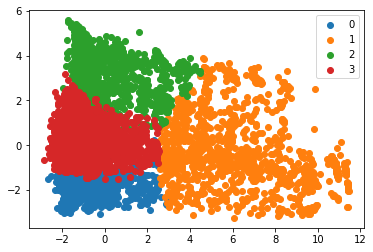

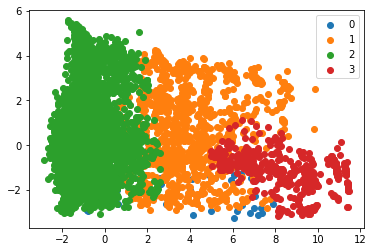

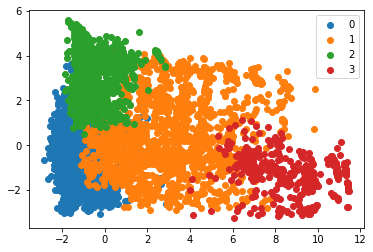

In [39]:
#Getting unique labels 
kmeans_labels = np.unique(data_pca_clusters['kmeans'])
#plotting the results:
for i in kmeans_labels:
    plt.scatter(data_pca_clusters[data_pca_clusters['kmeans']== i][0] , data_pca_clusters[data_pca_clusters['kmeans']== i][1] , label = i)
plt.legend()
plt.show()

####################
heir_complete = np.unique(data_pca_clusters['heir_complete'])
#plotting the results:
for i in heir_complete:
    plt.scatter(data_pca_clusters[data_pca_clusters['heir_complete']== i][0] , data_pca_clusters[data_pca_clusters['heir_complete']== i][1] , label = i)
plt.legend()
plt.show()

#############################
heir_ward = np.unique(data_pca_clusters['heir_ward'])
#plotting the results:
for i in heir_ward:
    plt.scatter(data_pca_clusters[data_pca_clusters['heir_ward']== i][0] , data_pca_clusters[data_pca_clusters['heir_ward']== i][1] , label = i)
plt.legend()
plt.show()

In [40]:
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.399999,-0.305081,-0.111112,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.0
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.600000,-0.305081,-0.222223,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.0
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.600000,2.336846,-0.222223,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.0
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.500000,0.000000,-0.222223,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.0
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.0


## clusters based on  balance and purchases

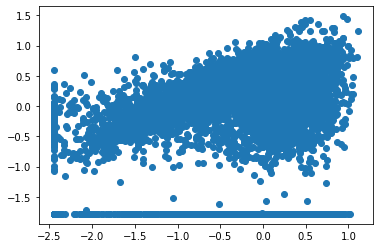

In [41]:
data_copy = pd.concat([df_clean, df_clean_copy.iloc[:,-3:]], axis = 1)
plt.scatter(data_copy['BALANCE'], data_copy['PURCHASES'])

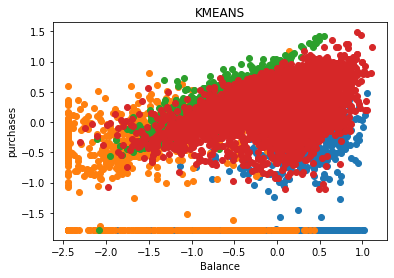

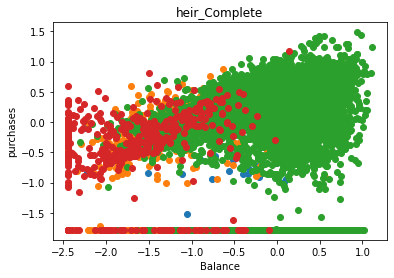

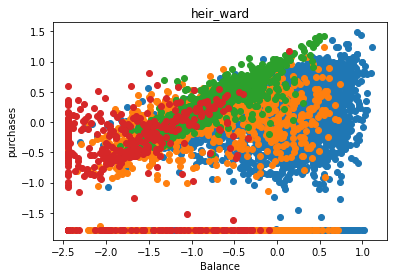

In [42]:
#Getting unique labels 
kmeans_labels = np.unique(data_copy['kmeans'])
#plotting the results:
for i in kmeans_labels:
    plt.scatter(data_copy[data_copy['kmeans']== i]['BALANCE'] , data_copy[data_copy['kmeans']== i]['PURCHASES'] , label = i)
plt.xlabel('Balance')
plt.ylabel('purchases')
plt.title('KMEANS')
plt.show()

####################
heir_complete = np.unique(data_copy['heir_complete'])
#plotting the results:
for i in heir_complete:
    plt.scatter(data_copy[data_copy['heir_complete']==i]['BALANCE']  , data_copy[data_copy['heir_complete']== i]['PURCHASES'] , label = i)
plt.xlabel('Balance')
plt.ylabel('purchases')
plt.title('heir_Complete')
plt.show()

#############################
heir_ward = np.unique(data_copy['heir_ward'])
#plotting the results:
for i in heir_ward:
    plt.scatter(data_copy[data_copy['heir_ward']== i]['BALANCE'] , data_copy[data_copy['heir_ward']== i]['PURCHASES'] , label = i)

plt.xlabel('Balance')
plt.ylabel('purchases')
plt.title('heir_ward')
plt.show()

# each algorithm (Kmeans and heirarcial )clusters the data differently

* we can't pick an algorithm over the other. each model would allow us to get different insights about clusters of clients

# flaws

* data had a lot of features and some of them were correlated
* we can remove some of the features and try the clustering algorithms again

# future work

* gain insights about each cluster in different clustring algorithms and figure out how each clustering algorithm clusterd the clients